# AI Group Project

Make sure to `pip install` all required libs from `requirements.txt` using `pip install -r requirements.txt`

## Import libs

In [160]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ProgSnap2 import PS2
import pickle

## Data Prep & Feature Generation

In [62]:
semester = 'S19'
BASE_PATH = os.path.join('data', semester)
TRAIN_PATH = os.path.join(BASE_PATH, 'Train')
TEST_PATH = os.path.join(BASE_PATH, 'Test')

In [63]:
early_train = pd.read_csv(os.path.join(TRAIN_PATH, 'early.csv'))
early_train

,SubjectID,AssignmentID,ProblemID,Attempts,CorrectEventually,Label
0,04c32d4d95425f73b3a1d6502aed4d48,439.0,1,1,True,True
1,04c32d4d95425f73b3a1d6502aed4d48,439.0,3,2,True,True
2,04c32d4d95425f73b3a1d6502aed4d48,439.0,5,3,True,True
3,04c32d4d95425f73b3a1d6502aed4d48,439.0,12,1,True,True
4,04c32d4d95425f73b3a1d6502aed4d48,439.0,13,2,True,True
...,...,...,...,...,...,...
6637,ffb72475a81de0e95b910ffad039f5c2,492.0,37,1,True,True
6638,ffb72475a81de0e95b910ffad039f5c2,492.0,38,1,True,True
6639,ffb72475a81de0e95b910ffad039f5c2,492.0,39,1,True,True
6640,ffb72475a81de0e95b910ffad039f5c2,492.0,40,3,True,True


In [64]:
late_train = pd.read_csv(os.path.join(TRAIN_PATH, 'late.csv'))
late_train

,SubjectID,AssignmentID,ProblemID,Label
0,04c32d4d95425f73b3a1d6502aed4d48,494.0,41,False
1,04c32d4d95425f73b3a1d6502aed4d48,494.0,43,True
2,04c32d4d95425f73b3a1d6502aed4d48,494.0,44,True
3,04c32d4d95425f73b3a1d6502aed4d48,494.0,46,True
4,04c32d4d95425f73b3a1d6502aed4d48,494.0,49,True
...,...,...,...,...
4196,ffb72475a81de0e95b910ffad039f5c2,502.0,64,True
4197,ffb72475a81de0e95b910ffad039f5c2,502.0,70,True
4198,ffb72475a81de0e95b910ffad039f5c2,502.0,71,True
4199,ffb72475a81de0e95b910ffad039f5c2,502.0,112,True


In [65]:
X_train_base = late_train.copy().drop('Label', axis=1)
y_train = late_train['Label'].values
X_train_base.shape, y_train.shape

((4201, 3), (4201,))

In [66]:
from sklearn.preprocessing import OneHotEncoder

problem_encoder = OneHotEncoder().fit(X_train_base[PS2.ProblemID].values.reshape(-1, 1))
problem_encoder.transform(X_train_base[PS2.ProblemID].values.reshape(-1, 1)).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [71]:
def extract_instance_features(instance, early_df):
    instance = instance.copy()
    subject_id = instance[PS2.SubjectID]
    early_problems = early_df[early_df[PS2.SubjectID] == subject_id]
    # Extract very naive features about the student
    # (without respect to the problem bring predicted)
    # Number of early problems attempted
    instance['ProblemsAttempted'] = early_problems.shape[0]
    # Percentage of early problems gotten correct eventually
    instance['PercCorrectEventually'] = np.mean(early_problems['CorrectEventually'])
    # Median attempts made on early problems
    instance['MedAttempts'] = np.median(early_problems['Attempts'])
    # Max attempts made on early problems
    instance['MaxAttempts'] = np.max(early_problems['Attempts'])
    # Percentage of problems gotten correct on the first try
    instance['PercCorrectFirstTry'] = np.mean(early_problems['Attempts'] == 1)
    df_generatedFeatures = pd.read_csv(os.path.join('Code/newEarlyTrain.csv'))
    df_generatedFeatures_problems = df_generatedFeatures[df_generatedFeatures[PS2.SubjectID] == subject_id]
    # print(len(df_generatedFeatures_problems))
    instance['PercSubjectSyntaxErrors'] = np.median(df_generatedFeatures_problems['pSubjectSyntaxError'])
    instance['PercSubjectSemanticErrors'] = np.median(df_generatedFeatures_problems['pSubjectSemanticError'])
    instance['meanLabels'] = np.mean(early_problems['Label'])
    instance = instance.drop('SubjectID')
    return instance

In [72]:
print(extract_instance_features(X_train_base.iloc[1], early_train))

AssignmentID                    494.0
ProblemID                          43
ProblemsAttempted                  30
PercCorrectEventually             1.0
MedAttempts                       6.5
MaxAttempts                        45
PercCorrectFirstTry          0.166667
PercSubjectSyntaxErrors         0.667
PercSubjectSemanticErrors         0.8
meanLabels                   0.433333
Name: 1, dtype: object


In [73]:
print(extract_instance_features(X_train_base.iloc[2], early_train))

AssignmentID                    494.0
ProblemID                          44
ProblemsAttempted                  30
PercCorrectEventually             1.0
MedAttempts                       6.5
MaxAttempts                        45
PercCorrectFirstTry          0.166667
PercSubjectSyntaxErrors         0.667
PercSubjectSemanticErrors         0.8
meanLabels                   0.433333
Name: 2, dtype: object


In [74]:
def extract_features(X, early_df, scaler, is_train):
    # First extract performance features for each row
    features = X.apply(lambda instance: extract_instance_features(instance, early_df), axis=1)
    # Then one-hot encode the problem_id and append it
    # problem_ids = problem_encoder.transform(features[PS2.ProblemID].values.reshape(-1, 1)).toarray()
    problem_ids = features[PS2.ProblemID].values.reshape(-1, 1)
    # Then get rid of nominal features
    features.drop([PS2.AssignmentID, PS2.ProblemID], axis=1, inplace=True)
    # Then scale the continuous features, fitting the scaler if this is training
    if is_train:
        scaler.fit(features)
    features = scaler.transform(features)
    # Return continuous and one-hot features together
    return np.concatenate([features, problem_ids], axis=1)

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = extract_features(X_train_base, early_train, scaler, True)

print(X_train.shape)
X_train[:2, ]

(4201, 9)


array([[ 0.51751812,  0.58371895,  1.76922077,  1.70602676, -0.89569333,
         0.65105279,  1.62095701, -1.41126789, 41.        ],
       [ 0.51751812,  0.58371895,  1.76922077,  1.70602676, -0.89569333,
         0.65105279,  1.62095701, -1.41126789, 43.        ]])

#### Pickle

In [77]:
with open('Code/LateTrainAllFeatures.pickle', 'wb') as handle:
    pickle.dump(X_train, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [80]:
late_train = pd.read_csv(os.path.join(TRAIN_PATH, 'late.csv'))


with open('Code/LateTrainAllFeatures.pickle', 'rb') as handle:
    X_Train = pickle.load(handle)

TrainLateProblemList = pd.read_csv('Code/LateTrainProblemList.csv')
X_train

array([[  0.51751812,   0.58371895,   1.76922077, ...,   1.62095701,
         -1.41126789,  41.        ],
       [  0.51751812,   0.58371895,   1.76922077, ...,   1.62095701,
         -1.41126789,  43.        ],
       [  0.51751812,   0.58371895,   1.76922077, ...,   1.62095701,
         -1.41126789,  44.        ],
       ...,
       [ -1.52965101,   0.58371895,  -0.48646859, ...,  -1.12815153,
          0.36655411,  71.        ],
       [ -1.52965101,   0.58371895,  -0.48646859, ...,  -1.12815153,
          0.36655411, 112.        ],
       [ -1.52965101,   0.58371895,  -0.48646859, ...,  -1.12815153,
          0.36655411, 118.        ]])

In [81]:
def perProblemFeatures(X_train, prob_id):
    # print('Problem ID: ', prob_id)
    n_previously_generated_features = 8
    subjectFeatures = []
    for i in range(len(X_train)):
        if X_train[i, n_previously_generated_features] == prob_id:
            subjectFeatures.append(X_train[i, :8]) # Try with different features from 5-8 (First 5 from Naive Model)
    return subjectFeatures

In [87]:
problem_X_Train = []
sum = 0

for i in range(20):
    # print(TrainLateProblemList['ProblemID'].iloc[i])
    problem_X_Train.append(perProblemFeatures(X_Train, TrainLateProblemList['ProblemID'].iloc[i]))
    sum += len(problem_X_Train[i])
    # print(len(problem_X_Train[i]))

len(problem_X_Train)

20

In [86]:
y_Train = []

for i in range(len(TrainLateProblemList)):
    y_TrainPerProblem = []
    for j in range(len(late_train)):
        if late_train['ProblemID'].iloc[j] == TrainLateProblemList['ProblemID'].iloc[i]:
            y_TrainPerProblem.append(late_train['Label'].iloc[j])
    y_Train.append(y_TrainPerProblem)

len(y_Train)

20

## Approach 1

### LogisticRegressionCV

In [100]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

macrof1_model = []
macrof1_cv = []
AUC_model = []
AUC_cv = []

for l in range(len(y_Train)):
    X_train, X_test, Y_train, Y_test = train_test_split(problem_X_Train[l], y_Train[l], test_size=0.2, random_state=42)
    model = LogisticRegressionCV()
    model.fit(X_train, Y_train)
    train_predictions = model.predict(X_test)
    # print(classification_report(Y_test, train_predictions))
    # print('AUC: ' + str(roc_auc_score(Y_test, train_predictions)))
    # print('Macro F1: ' + str(f1_score(Y_test, train_predictions, average='macro')))
    macrof1_model.append((f1_score(Y_test, train_predictions, average='macro')))
    AUC_model.append(roc_auc_score(Y_test, train_predictions))
    cv_results = cross_validate(model, X_train, Y_train, cv=10, scoring=['accuracy', 'f1_macro', 'roc_auc'])
    # print(f'Accuracy: {np.mean(cv_results["test_accuracy"])}')
    # print(f'AUC: {np.mean(cv_results["test_roc_auc"])}')
    # print(f'Macro F1: {np.mean(cv_results["test_f1_macro"])}')
    macrof1_cv.append(np.mean(cv_results["test_f1_macro"]))
    AUC_cv.append(np.mean(cv_results["test_roc_auc"]))

print('Mean model f1 score: ', np.mean(macrof1_model))
print("Mean cv f1 score: ", np.mean(macrof1_cv))
print('AUC Model: ', np.mean(AUC_model))
print('AUC CV: ', np.mean(AUC_cv))

Mean model f1 score:  0.5289463730389105
Mean cv f1 score:  0.5292138201423396
AUC Model:  0.5654459542637073
AUC CV:  0.7249301878676879


### RandomForestClassifier

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

macrof1_model = []
macrof1_cv = []
AUC_model = []
AUC_cv = []

for l in range(len(y_Train)):
    X_train, X_test, Y_train, Y_test = train_test_split(problem_X_Train[l], y_Train[l], test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_estimators=500, max_leaf_nodes=64, n_jobs=-1)
    model.fit(X_train, Y_train)
    train_predictions = model.predict(X_test)
    # print(classification_report(Y_test, train_predictions))
    # print('AUC: ' + str(roc_auc_score(Y_test, train_predictions)))
    # print('Macro F1: ' + str(f1_score(Y_test, train_predictions, average='macro')))
    macrof1_model.append((f1_score(Y_test, train_predictions, average='macro')))
    AUC_model.append(roc_auc_score(Y_test, train_predictions))
    cv_results = cross_validate(model, X_train, Y_train, cv=10, scoring=['accuracy', 'f1_macro', 'roc_auc'])
    # print(f'Accuracy: {np.mean(cv_results["test_accuracy"])}')
    # print(f'AUC: {np.mean(cv_results["test_roc_auc"])}')
    # print(f'Macro F1: {np.mean(cv_results["test_f1_macro"])}')
    macrof1_cv.append(np.mean(cv_results["test_f1_macro"]))
    AUC_cv.append(np.mean(cv_results["test_roc_auc"]))

print('Mean model f1 score: ', np.mean(macrof1_model))
print("Mean cv f1 score: ", np.mean(macrof1_cv))
print('AUC Model: ', np.mean(AUC_model))
print('AUC CV: ', np.mean(AUC_cv))

Mean model f1 score:  0.5779232081209053
Mean cv f1 score:  0.556204217956733
AUC Model:  0.5866205216439934
AUC CV:  0.7013907967032968


In [219]:
predicted_f19 = pd.read_csv('PredictedF19RandomForrest.csv')
# len(predicted_f19['SubjectID'].unique())
predicted_f19[['ProblemID', 'SubjectID', 'Label']]





,ProblemID,SubjectID,Label
0,41,04c32d4d95425f73b3a1d6502aed4d48,True
1,43,04c32d4d95425f73b3a1d6502aed4d48,True
2,44,04c32d4d95425f73b3a1d6502aed4d48,True
3,46,04c32d4d95425f73b3a1d6502aed4d48,True
4,49,04c32d4d95425f73b3a1d6502aed4d48,False
...,...,...,...
4196,64,ffb72475a81de0e95b910ffad039f5c2,True
4197,70,ffb72475a81de0e95b910ffad039f5c2,True
4198,71,ffb72475a81de0e95b910ffad039f5c2,True
4199,112,ffb72475a81de0e95b910ffad039f5c2,True


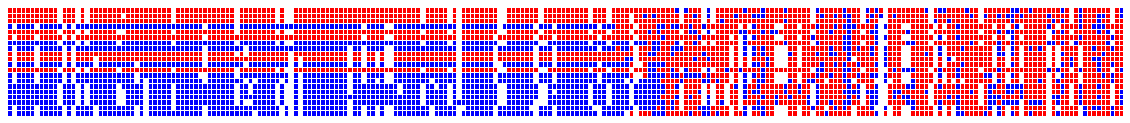

In [237]:
import seaborn as sns

# sns.heatmap(np.asarray(heatmap_data, dtype=object))
data_hm = predicted_f19[['ProblemID', 'SubjectID', 'Label']]
data_hm = data_hm.pivot("ProblemID", "SubjectID", "Label")

fig, ax = plt.subplots(figsize=(20,2))
sns.color_palette("crest", as_cmap=True)
ax = sns.heatmap(data_hm.to_numpy(float), cbar=False, linewidths=.5, xticklabels=False, yticklabels=False, ax=ax, cmap='bwr')


In [224]:
late_train = pd.read_csv(os.path.join(TRAIN_PATH, 'early.csv'))
late_train[['ProblemID', 'SubjectID', 'Label']]

# predicted_f19 = pd.read_csv('PredictedF19RandomForrest.csv')
# # len(predicted_f19['SubjectID'].unique())
# predicted_f19[['ProblemID', 'SubjectID', 'Label']]





,ProblemID,SubjectID,Label
0,1,04c32d4d95425f73b3a1d6502aed4d48,True
1,3,04c32d4d95425f73b3a1d6502aed4d48,True
2,5,04c32d4d95425f73b3a1d6502aed4d48,True
3,12,04c32d4d95425f73b3a1d6502aed4d48,True
4,13,04c32d4d95425f73b3a1d6502aed4d48,True
...,...,...,...
6637,37,ffb72475a81de0e95b910ffad039f5c2,True
6638,38,ffb72475a81de0e95b910ffad039f5c2,True
6639,39,ffb72475a81de0e95b910ffad039f5c2,True
6640,40,ffb72475a81de0e95b910ffad039f5c2,True


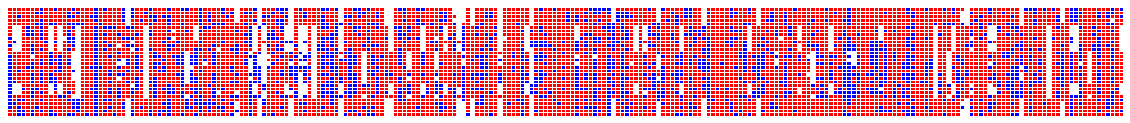

In [236]:
import seaborn as sns

data_hm = late_train[['ProblemID', 'SubjectID', 'Label']]
data_hm = late_train.pivot("ProblemID", "SubjectID", "Label")

fig, ax = plt.subplots(figsize=(20,2))
sns.color_palette("crest", as_cmap=True)
ax = sns.heatmap(data_hm.to_numpy(float), cbar=False, linewidths=.5, xticklabels=False, yticklabels=False, ax=ax, cmap='bwr')


### Polynomial RBF SVM

In [104]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

macrof1_model = []
macrof1_cv = []
AUC_model = []
AUC_cv = []

for l in range(len(y_Train)):
    X_train, X_test, Y_train, Y_test = train_test_split(problem_X_Train[l], y_Train[l], test_size=0.2, random_state=42)
    model = svm.SVC(kernel='rbf', gamma=5, C=0.001)
    model.fit(X_train, Y_train)
    train_predictions = model.predict(X_test)
    # print(classification_report(Y_test, train_predictions))
    # print('AUC: ' + str(roc_auc_score(Y_test, train_predictions)))
    # print('Macro F1: ' + str(f1_score(Y_test, train_predictions, average='macro')))
    macrof1_model.append((f1_score(Y_test, train_predictions, average='macro')))
    AUC_model.append(roc_auc_score(Y_test, train_predictions))
    cv_results = cross_validate(model, X_train, Y_train, cv=10, scoring=['accuracy', 'f1_macro', 'roc_auc'])
    # print(f'Accuracy: {np.mean(cv_results["test_accuracy"])}')
    # print(f'AUC: {np.mean(cv_results["test_roc_auc"])}')
    # print(f'Macro F1: {np.mean(cv_results["test_f1_macro"])}')
    macrof1_cv.append(np.mean(cv_results["test_f1_macro"]))
    AUC_cv.append(np.mean(cv_results["test_roc_auc"]))

print('Mean model f1 score: ', np.mean(macrof1_model))
print("Mean cv f1 score: ", np.mean(macrof1_cv))
print('AUC Model: ', np.mean(AUC_model))
print('AUC CV: ', np.mean(AUC_cv))

Mean model f1 score:  0.42105901484035435
Mean cv f1 score:  0.4259118937244007
AUC Model:  0.5
AUC CV:  0.6081144827394828


## Approach 2

In [106]:
def extractSkills():
    df = pd.read_csv('Code/Approach2/ConceptsUsed.csv')
    last_skills = []
    final_skills = []

    for i in range(30, len(df)):
        for column, row in df.iteritems():
            if df[column].iloc[i] == 1:
                last_skills.append(column)
        print(last_skills)
        final_skills.append(last_skills)
        last_skills = []
    print(final_skills)

    with open('Code/Approach2/LateSkills.pickle', 'wb') as handle:
        pickle.dump(final_skills, handle, protocol=pickle.HIGHEST_PROTOCOL)

extractSkills()

['For', 'Math+-*/', 'ArrayIndex']
['If/Else', 'For', 'LogicCompareNum', 'ArrayIndex']
['If/Else', 'For', 'Math+-*/', 'Math%', 'LogicCompareNum', 'ArrayIndex']
['If/Else', 'For', 'LogicAndNotOr', 'LogicCompareNum', 'ArrayIndex']
['If/Else', 'For', 'Math+-*/', 'LogicCompareNum', 'ArrayIndex']
['If/Else', 'For', 'Math+-*/', 'LogicAndNotOr', 'LogicCompareNum', 'ArrayIndex']
['If/Else', 'For', 'NestedFor', 'Math%', 'LogicAndNotOr', 'LogicCompareNum', 'ArrayIndex']
['If/Else', 'For', 'NestedFor', 'LogicAndNotOr', 'LogicCompareNum', 'ArrayIndex']
['If/Else', 'For', 'Math+-*/', 'LogicAndNotOr', 'LogicCompareNum', 'ArrayIndex']
['If/Else', 'For', 'LogicAndNotOr', 'LogicCompareNum', 'ArrayIndex']
['If/Else', 'For', 'Math+-*/', 'LogicAndNotOr', 'LogicCompareNum', 'ArrayIndex']
['If/Else', 'For', 'LogicCompareNum', 'ArrayIndex']
['If/Else', 'For', 'Math%', 'LogicCompareNum', 'ArrayIndex']
['If/Else', 'For', 'Math+-*/', 'LogicAndNotOr', 'LogicCompareNum', 'ArrayIndex']
['For', 'ArrayIndex']
['If/El

In [ ]:
# ToDo...